## Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import sys
# import python library path
sys.path.append('/home/codespace/.local/lib/python3.10/site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

## Data Consolidation

**Import raw dataset from a CSV file into a dataframe**

In [6]:
raw_df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
raw_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**Show the number of records and columns as well as features**

In [7]:
print("Number of records:", raw_df.shape[0])
print("Number of columns:", raw_df.shape[1])
print('-'*100)
print("The attributes of data :", raw_df.columns.values)

Number of records: 12684
Number of columns: 26
----------------------------------------------------------------------------------------------------
The attributes of data : ['destination' 'passanger' 'weather' 'temperature' 'time' 'coupon'
 'expiration' 'gender' 'age' 'maritalStatus' 'has_children' 'education'
 'occupation' 'income' 'car' 'Bar' 'CoffeeHouse' 'CarryAway'
 'RestaurantLessThan20' 'Restaurant20To50' 'toCoupon_GEQ5min'
 'toCoupon_GEQ15min' 'toCoupon_GEQ25min' 'direction_same' 'direction_opp'
 'Y']


**Show the details of the dataframe**

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Data Cleaning

**Check duplicates**

In [9]:
duplicateRows = raw_df[raw_df.duplicated()]
duplicateRows.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0


**Remove duplicates**

In [10]:
raw_df.drop_duplicates(inplace=True)
raw_df.reset_index(inplace=True)
raw_df.drop(columns=['index'],inplace=True)
raw_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12606,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12607,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12608,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


**Check missing values**

In [11]:
print('Is there any missing value?',raw_df.isnull().values.any())
missing_percentage = (raw_df.isnull().sum() / (raw_df.shape[0])) * 100
missing_value_df = pd.DataFrame({'Count': raw_df.isnull().sum(),'Percentage': missing_percentage})
missing_value_df[missing_value_df.Count != 0]

Is there any missing value? True


,Count,Percentage
car,12502,99.143537
Bar,107,0.848533
CoffeeHouse,217,1.720856
CarryAway,150,1.189532
RestaurantLessThan20,129,1.022998
Restaurant20To50,189,1.498810


**Drop car feature**

In [12]:
raw_df.drop(['car'], axis=1, inplace=True)
raw_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12606,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12607,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12608,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


**Imputation By Mode**

In [13]:
# columns with missing data: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
raw_df['Bar'] = raw_df['Bar'].fillna(raw_df['Bar'].value_counts().index[0])
raw_df['CoffeeHouse'] = raw_df['CoffeeHouse'].fillna(raw_df['CoffeeHouse'].value_counts().index[0])
raw_df['CarryAway'] = raw_df['CarryAway'].fillna(raw_df['CarryAway'].value_counts().index[0])
raw_df['RestaurantLessThan20'] = raw_df['RestaurantLessThan20'].fillna(raw_df['RestaurantLessThan20'].value_counts().index[0])
raw_df['Restaurant20To50'] = raw_df['Restaurant20To50'].fillna(raw_df['Restaurant20To50'].value_counts().index[0])

In [14]:
print('Is there any missing value?',raw_df.isnull().values.any())

Is there any missing value? False


## Data Transformation

**Correlation analysis**

In [16]:
raw_df.corr(numeric_only=True)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


**Check toCoupon_GEQ5min**

<Axes: >

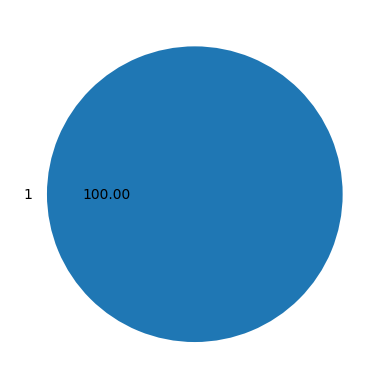

In [17]:
raw_df.groupby("toCoupon_GEQ5min").size().plot(kind='pie', autopct='%.2f')

**Drop toCoupon_GEQ5min and direction_opp features**

In [18]:
raw_df.drop(['toCoupon_GEQ5min','direction_opp'], axis=1, inplace=True)
raw_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1,1
12606,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,0,1
12607,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1,0
12608,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0


**Create new feature**

In [19]:
'''
Reasons for creating new features from below columns:
if Coupon_GEQ25min == 1, toCoupon_GEQ => 2 (resemble 15 <= Coupon_GEQ <= 25)
elif Coupon_GEQ15min == 1 => 1 (resemble 5 <= Coupon_GEQ <= 15 )
else: Coupon_GEQ => 0 (resemble Coupon_GEQ <= 5)
'''
raw_df['toCoupon_GEQ'] = 0;
for index, row in raw_df.iterrows():
    if(row["toCoupon_GEQ25min"] == 1):
      raw_df.at[index,'toCoupon_GEQ']=2;
    elif(row["toCoupon_GEQ15min"] == 1):
      raw_df.at[index,'toCoupon_GEQ']=1;
    else:
      raw_df.at[index,'toCoupon_GEQ']=0;
raw_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,toCoupon_GEQ
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,1,0
12606,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,0,1,0
12607,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,0,0
12608,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,0,2


**Drop toCoupon_GEQ15min and toCoupon_GEQ25min features**

In [20]:
raw_df.drop(columns=['toCoupon_GEQ15min','toCoupon_GEQ25min'], axis=1, inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

## Data Exploration

In [21]:
print("After data pre-processing,")
print("Number of records:", raw_df.shape[0])
print("Number of features:", raw_df.shape[1])
print('-'*100)
print("The attributes of data :\n", raw_df.columns.values)

After data pre-processing,
Number of records: 12610
Number of features: 22
----------------------------------------------------------------------------------------------------
The attributes of data :
 ['destination' 'passanger' 'weather' 'temperature' 'time' 'coupon'
 'expiration' 'gender' 'age' 'maritalStatus' 'has_children' 'education'
 'occupation' 'income' 'Bar' 'CoffeeHouse' 'CarryAway'
 'RestaurantLessThan20' 'Restaurant20To50' 'direction_same' 'Y'
 'toCoupon_GEQ']


In [22]:
raw_df.describe()

,temperature,has_children,direction_same,Y,toCoupon_GEQ
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,0.215543,0.567565,0.675813
std,19.153386,0.492657,0.411215,0.495434,0.671687
min,30.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,2.000000


**Check class imbalance**

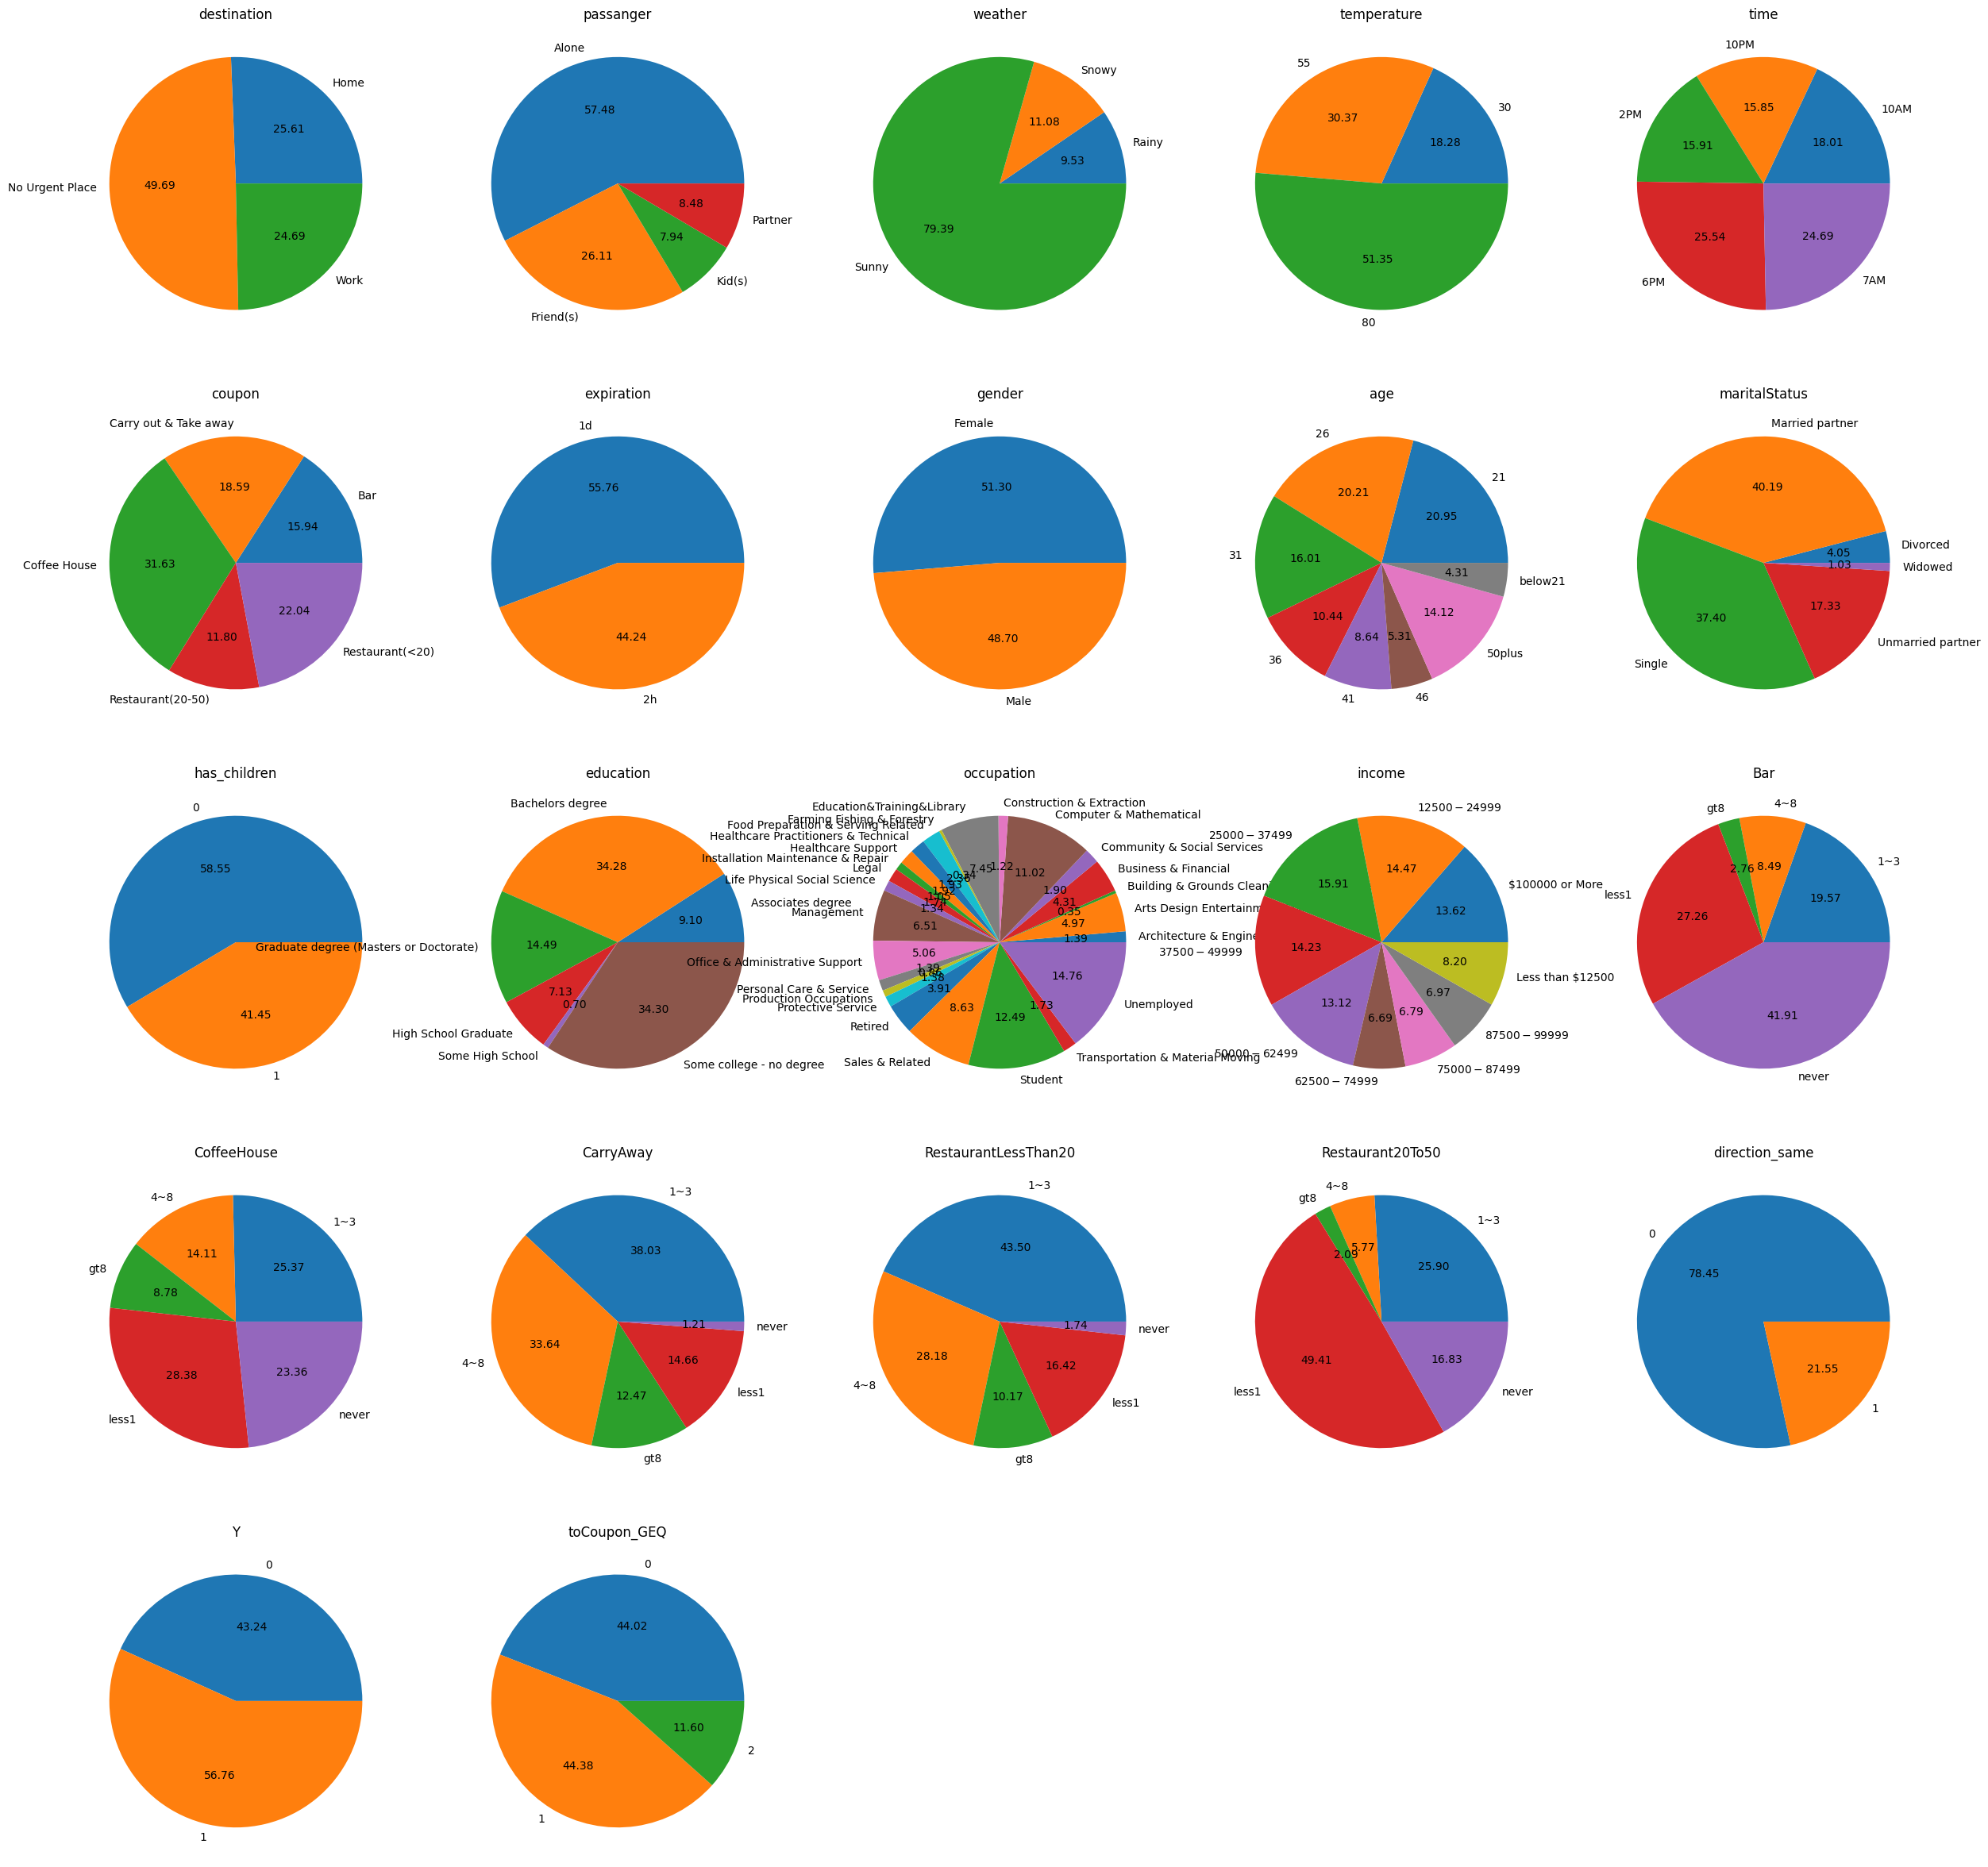

In [23]:
plt.figure(figsize=(30,30))
count = 0
for i in list(raw_df.columns):
  count += 1
  plt.subplot(5, 5, count)
  plt.title(i)
  raw_df.groupby(i).size().plot(kind='pie', autopct='%.2f')

**Univariate Analysis**

In [24]:
def univariate_analysis(feature):
    df_EDA = pd.DataFrame(sorted(list(raw_df[feature].unique())),columns=[feature])
    df_EDA['Count'] = list(raw_df.groupby(feature).Y.count())
    df_EDA['Accepted'] = list(raw_df[raw_df.Y==1].groupby(feature).Y.count())
    df_EDA['Rejected'] = list(raw_df[raw_df.Y==0].groupby(feature).Y.count())
    df_EDA['% of Accepted'] = round(df_EDA['Accepted']/df_EDA['Count']*100,3)
    df_EDA['% of Rejected'] = round(df_EDA['Rejected']/df_EDA['Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Count', ascending=False)

    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[feature],df_EDA['Count'])
    plt.barh(df_EDA[feature],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(feature)
    plt.show()

    return df_EDA

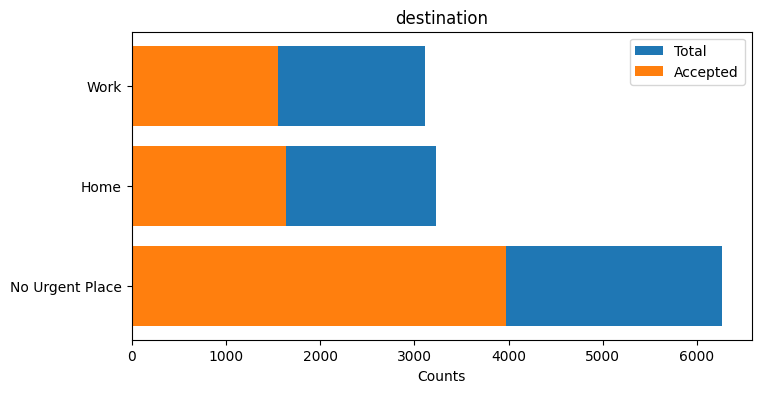

,destination,Count,Accepted,Rejected,% of Accepted,% of Rejected
1,No Urgent Place,6266,3969,2297,63.342,36.658
0,Home,3230,1635,1595,50.619,49.381
2,Work,3114,1553,1561,49.872,50.128


In [ ]:
univariate_analysis('destination')

**Question 1: What are your observations about the driving distance (i.e., toCoupon_GEQ)?**

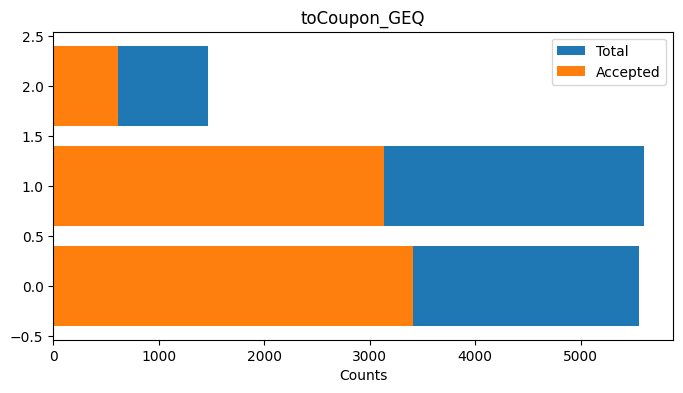

,toCoupon_GEQ,Count,Accepted,Rejected,% of Accepted,% of Rejected
1,1,5596,3136,2460,56.040,43.960
0,0,5551,3407,2144,61.376,38.624
2,2,1463,614,849,41.969,58.031


In [ ]:
univariate_analysis('toCoupon_GEQ')

Answer 1: Highest percentage of people who drive less than 5 mins would accept the Coupon.

**Question 2: How about the weather?**

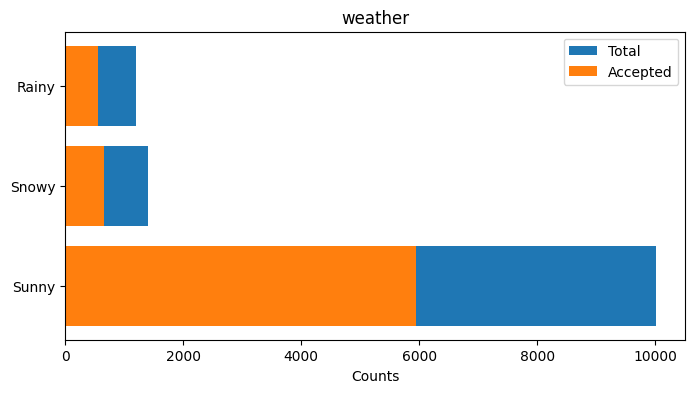

,weather,Count,Accepted,Rejected,% of Accepted,% of Rejected
2,Sunny,10011,5941,4070,59.345,40.655
1,Snowy,1397,659,738,47.173,52.827
0,Rainy,1202,557,645,46.339,53.661


In [25]:
univariate_analysis('weather')

Answer 2: When the weather is sunny, the acceptance rate of coupon is the highest. When the weather is rainy, the acceptance rate of coupon is the lowest.

**Question 3: Which types of coupon do people prefer to use?**

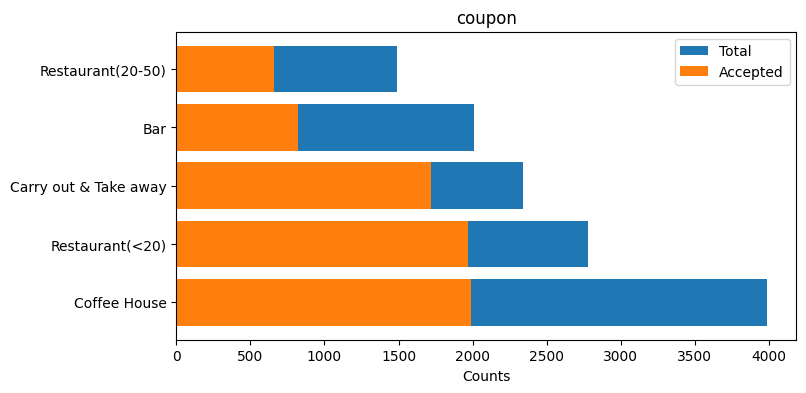

,coupon,Count,Accepted,Rejected,% of Accepted,% of Rejected
1,Carry out & Take away,2344,1720,624,73.379,26.621
4,Restaurant(<20),2779,1967,812,70.781,29.219
2,Coffee House,3989,1989,2000,49.862,50.138
3,Restaurant(20-50),1488,657,831,44.153,55.847
0,Bar,2010,824,1186,40.995,59.005


In [27]:
univariate_analysis('coupon').sort_values('% of Accepted', ascending = False)

Answer 3: People prefer to use Carry out and take away coupon.

**Question 4: Please provide one more univeriate analysis that you find it the most interesting.**

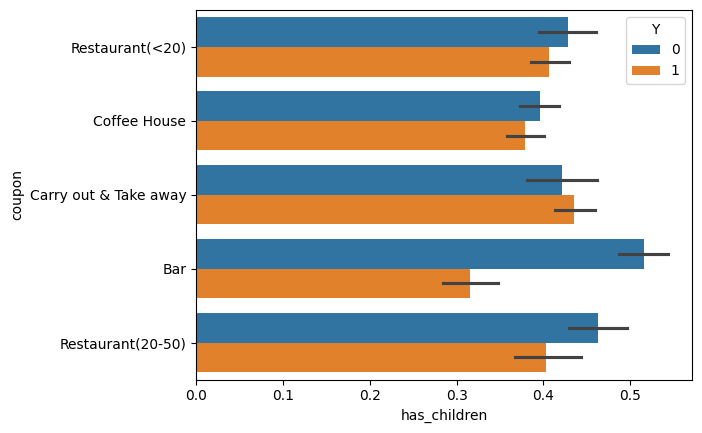

In [28]:
# a = univariate_analysis('has_children')
# b = univariate_analysis('coupon')
import seaborn as sns
sns.barplot(x='has_children',y='coupon',data=raw_df, hue = 'Y')
plt.show()

Answer 4: People have children may tend to not accept Bar's coupon.

**Bivariate Analysis**

In [29]:
def bivariate_analysis(x_var, y_var, c1, c2):

  stat = pd.crosstab(index=raw_df[x_var], columns=raw_df[y_var])
  stat.plot(kind="bar", figsize=(8,8),stacked=False)

  a = list(raw_df[x_var].unique())
  b = list(raw_df[y_var].unique())
  df = pd.DataFrame([(i, j) for i in a for j in b], columns=[x_var,y_var])
  Count=[]; Accepted=[]; Rejected=[]
  for i in range(df.shape[0]):
      Count.append((raw_df[(c1==df[x_var][i]) & (c2==df[y_var][i])]).shape[0])
      Accepted.append((raw_df[(c1==df[x_var][i]) & (c2==df[y_var][i]) & (raw_df.Y==1)]).shape[0])
      Rejected.append((raw_df[(c1==df[x_var][i]) & (c2==df[y_var][i]) & (raw_df.Y==0)]).shape[0])
  df['Count'] = Count
  df['Accepted'] = Accepted
  df['Rejected'] = Rejected
  df['% of Accepted'] = round(df['Accepted']/df['Count']*100,3)
  df['% of Rejected'] = round(df['Rejected']/df['Count']*100,3)
  df = df.dropna()
  df = df.sort_values(by='% of Accepted', ascending=False)
  d = pd.concat([df.head(), df.tail()], axis=0)

  return d

,weather,coupon,Count,Accepted,Rejected,% of Accepted,% of Rejected
0,Sunny,Restaurant(<20),2237,1718,519,76.799,23.201
2,Sunny,Carry out & Take away,1722,1312,410,76.190,23.810
12,Snowy,Carry out & Take away,305,215,90,70.492,29.508
7,Rainy,Carry out & Take away,317,193,124,60.883,39.117
6,Rainy,Coffee House,226,118,108,52.212,47.788
5,Rainy,Restaurant(<20),167,66,101,39.521,60.479
9,Rainy,Restaurant(20-50),65,25,40,38.462,61.538
8,Rainy,Bar,427,155,272,36.300,63.700
13,Snowy,Bar,238,76,162,31.933,68.067
14,Snowy,Restaurant(20-50),177,54,123,30.508,69.492


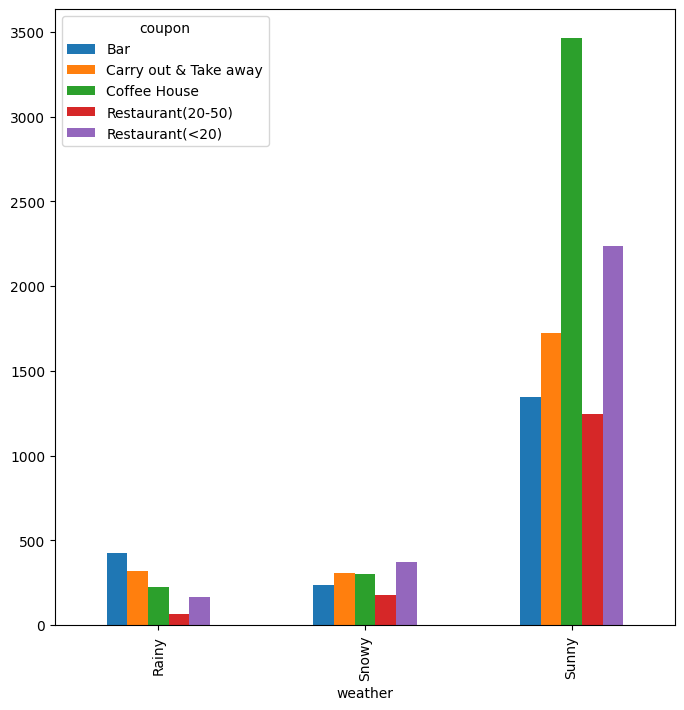

In [30]:
a = bivariate_analysis('weather','coupon',raw_df.weather,raw_df.coupon)
a

**Question 5: At what time, which types of coupon have the acceptance ratio higher than 80%?**

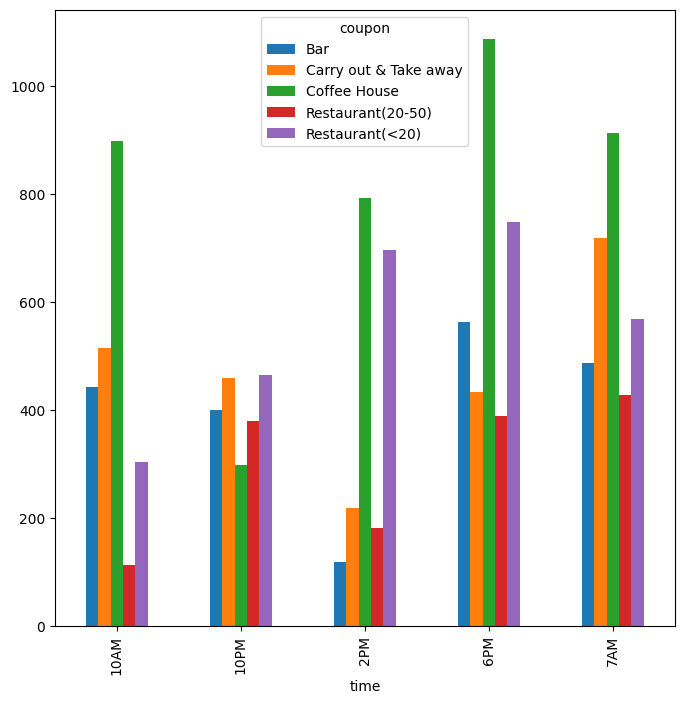

In [36]:
b = bivariate_analysis('time','coupon',raw_df.time,raw_df.coupon)

In [43]:
# find which time the % of Accepted is higher than 80%
b[b['% of Accepted']>80].pivot(index = 'time', columns = 'coupon', values = '% of Accepted')

coupon,Carry out & Take away,Restaurant(<20)
time,,
2PM,86.697,81.466
6PM,82.448,82.754


Answer 5: at 2PM and 6PM, the acceptance ratio of coupon would be higher

**Question 6: Please provide one more biveriate analysis that you find it the most interesting.**

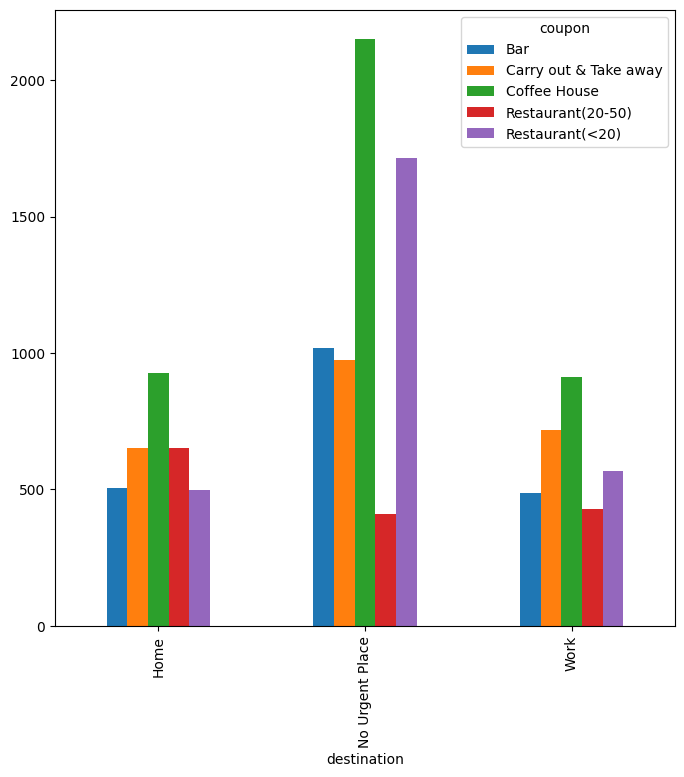

In [44]:
c = bivariate_analysis('destination','coupon',raw_df.destination,raw_df.coupon)

In [50]:
# summary of c
c.pivot(index = 'destination', columns = 'coupon', values = '% of Accepted')

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
destination,,,,,
Home,NaN,78.802,36.177,43.098,NaN
No Urgent Place,40.824,76.181,NaN,NaN,79.288
Work,36.550,64.673,NaN,40.047,58.451


Answer 6: when the destination is "No Urgent Place", the acceptance ratio of Restaurant(<20) is the highest.

## Encoding Categorical Data

**Label and Ordinal Encoding for Ordinal Data**

In [51]:
encoded_df = raw_df.copy()

freq=		{'never':0,
		'less1': 1,
		'1~3':2,
		'4~8':3,
		'gt8':4}

temp_map=	{30: 1, 55: 2, 80:3}

time_map=	{"7AM":0, "10AM":1, "2PM":2, "6PM":3, "10PM":4}

age_map=	{"below21":0, "21":1, "26":2, "36":3, "31":4, "41":5, "46":6, "50plus":7}

income_map= 	{'Less than $12500': 0,
            	'$12500 - $24999': 1,
            	'$25000 - $37499': 2,
           	  '$37500 - $49999': 3,
            	'$50000 - $62499': 4,
            	'$62500 - $74999': 5,
           	  '$75000 - $87499': 6,
           	  '$87500 - $99999': 7,
           	  '$100000 or More': 8}

edu_map= 	{'Some High School':0,
		      'High School Graduate':1,
	      	'Some college - no degree':2,
	      	'Associates degree': 3,
	      	'Bachelors degree':4,
	      	'Graduate degree (Masters or Doctorate)':5}

freq_cols=['Restaurant20To50', 'RestaurantLessThan20', 'CarryAway', 'CoffeeHouse', 'Bar']
for col in freq_cols:
    encoded_df[col] = encoded_df[col].map(freq)

encoded_df['temperature'] = encoded_df['temperature'].map(temp_map)
encoded_df['time'] = encoded_df['time'].map(time_map)
encoded_df['age'] = encoded_df['age'].map(age_map)
encoded_df['income'] = encoded_df['income'].map(income_map)
encoded_df['education'] = encoded_df['education'].map(edu_map)

encoded_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,toCoupon_GEQ
0,No Urgent Place,Alone,Sunny,2,2,Restaurant(<20),1d,Female,1,Unmarried partner,...,Unemployed,3,0,0,2,3,2,0,1,0
1,No Urgent Place,Friend(s),Sunny,3,1,Coffee House,2h,Female,1,Unmarried partner,...,Unemployed,3,0,0,2,3,2,0,0,0
2,No Urgent Place,Friend(s),Sunny,3,1,Carry out & Take away,2h,Female,1,Unmarried partner,...,Unemployed,3,0,0,2,3,2,0,1,1
3,No Urgent Place,Friend(s),Sunny,3,2,Coffee House,2h,Female,1,Unmarried partner,...,Unemployed,3,0,0,2,3,2,0,0,1
4,No Urgent Place,Friend(s),Sunny,3,2,Coffee House,1d,Female,1,Unmarried partner,...,Unemployed,3,0,0,2,3,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,Home,Partner,Rainy,2,3,Carry out & Take away,1d,Male,2,Single,...,Sales & Related,6,0,0,2,3,2,1,1,0
12606,Work,Alone,Rainy,2,0,Carry out & Take away,1d,Male,2,Single,...,Sales & Related,6,0,0,2,3,2,0,1,0
12607,Work,Alone,Snowy,1,0,Coffee House,1d,Male,2,Single,...,Sales & Related,6,0,0,2,3,2,1,0,0
12608,Work,Alone,Snowy,1,0,Bar,1d,Male,2,Single,...,Sales & Related,6,0,0,2,3,2,0,0,2


**One Hot Encoding for Nominal Data**

In [52]:
normVars = ["gender","maritalStatus","coupon", "expiration", "occupation","weather", "destination", "passanger"]
encoded_df = pd.get_dummies(data=encoded_df, columns=normVars)
encoded_df

,temperature,time,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,...,weather_Rainy,weather_Snowy,weather_Sunny,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner
0,2,2,1,1,2,3,0,0,2,3,...,False,False,True,False,True,False,True,False,False,False
1,3,1,1,1,2,3,0,0,2,3,...,False,False,True,False,True,False,False,True,False,False
2,3,1,1,1,2,3,0,0,2,3,...,False,False,True,False,True,False,False,True,False,False
3,3,2,1,1,2,3,0,0,2,3,...,False,False,True,False,True,False,False,True,False,False
4,3,2,1,1,2,3,0,0,2,3,...,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,2,3,2,0,4,6,0,0,2,3,...,True,False,False,True,False,False,False,False,False,True
12606,2,0,2,0,4,6,0,0,2,3,...,True,False,False,False,False,True,True,False,False,False
12607,1,0,2,0,4,6,0,0,2,3,...,False,True,False,False,False,True,True,False,False,False
12608,1,0,2,0,4,6,0,0,2,3,...,False,True,False,False,False,True,True,False,False,False
